<a href="https://colab.research.google.com/github/Anjanamb/A04/blob/main/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [151]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Transform images from (width, width, 3) to 3072-dimensional vectors (width*width*3)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [152]:
iterations = 300 # epochs
lr = 0.0009 # learning rate
lr_decay = 0.99999
reg = 0.004
loss_history = []
train_acc_history = []
val_acc_history = []
#seed = 0
#rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    #batch_indices = np.arange(batch_size)
    #rng.shuffle(batch_indices)
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) +b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
    loss_history.append(loss)
    if t % 10 == 0:
      print('Iteration %d / %d: loss %f' % (t, iterations, loss))

    dy_pred = 1./batch_size*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat backward
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Iteration 0 / 300: loss 1.000039
Iteration 10 / 300: loss 0.914746
Iteration 20 / 300: loss 0.902170
Iteration 30 / 300: loss 0.899868
Iteration 40 / 300: loss 0.896894
Iteration 50 / 300: loss 0.890784
Iteration 60 / 300: loss 0.886296
Iteration 70 / 300: loss 0.872652
Iteration 80 / 300: loss 0.872792
Iteration 90 / 300: loss 0.865719
Iteration 100 / 300: loss 0.861065
Iteration 110 / 300: loss 0.859225
Iteration 120 / 300: loss 0.861822
Iteration 130 / 300: loss 0.853796
Iteration 140 / 300: loss 0.852917
Iteration 150 / 300: loss 0.846717
Iteration 160 / 300: loss 0.846098
Iteration 170 / 300: loss 0.840610
Iteration 180 / 300: loss 0.851467
Iteration 190 / 300: loss 0.844752
Iteration 200 / 300: loss 0.841345
Iteration 210 / 300: loss 0.842343
Iteration 220 / 300: loss 0.838116
Iteration 230 / 300: loss 0.834882
Iteration 240 / 300: loss 0.833521
Iteration 250 / 300: loss 0.833378
Iteration 260 / 300: loss 0.845970
Iteration 270 / 300: loss 0.831689
Iteration 280 / 300: loss 0.827

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

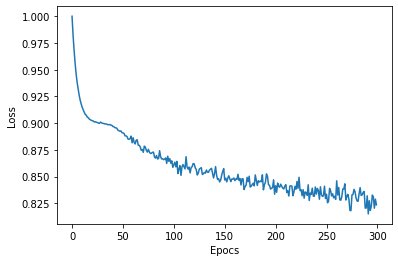

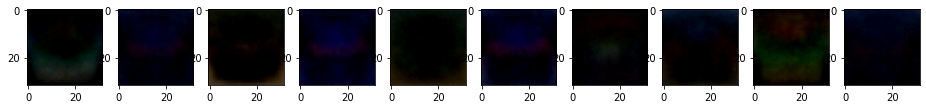

x_train -> (50000, 3072)
train_acc =  0.710911111111111
train_loss =  0.8276082955297573
x_test -> (10000, 3072)
test_acc =  0.7122666666666666
test_loss =  0.8273025692023684


In [153]:
plt.plot(loss_history)
plt.xlabel('Epocs')
plt.ylabel('Loss')
f, axarr = plt.subplots(1,10)
f.set_size_inches(16, 6)

for i in range(10):
    img = w1[:, i].reshape(32, 32, 3) # CIFAR10
    #img = w1[:, i].reshape(28, 28) # MNIST
    axarr[i].imshow(img*1000)
plt.show()

x_tr = x_train
print("x_train ->", x_tr.shape)
h = 1.0/(1.0 + np.exp(-(x_tr.dot(w1) + b1))) #sigmoid
y_pred = h.dot(w2) + b2

tr_acc = 1.0 -1/(Ntr*9)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
tr_loss = 1./Ntr*np.square(y_pred-y_train).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
print("train_acc = ", tr_acc)
print("train_loss = ", tr_loss)

x_ts = x_test
print("x_test ->", x_ts.shape)
h = 1.0/(1.0 + np.exp(-(x_ts.dot(w1) + b1))) #sigmoid
y_pred= h.dot(w2) + b2

ts_acc = 1.0 - 1/(Nte*9)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
ts_loss = 1./Nte*np.square(y_pred-y_test).sum() + reg * (np.sum(w2 * w2) + np.sum(w1 * w1))
print("test_acc = ", ts_acc)
print("test_loss = ", ts_loss)